[외국인 관광 소비, 인원 분석]
- 총 관광소비, 의료 관광, 쇼핑관광을 두 가지 통계로 분석하여 각 관계간의 연관관계를 밝힘
    1. 금액
    2. 인원
- 최종적으로 의료관광고 쇼핑관광이 관광사업에서 차지하는 비중과 성장세에 대해 확인
- 두 가지 관광이 경쟁력이 있다는 것을 확인.


[필요 데이터]
- 18-24 외국인 총 관광소비 금액/ 총 관광인원 수 
- 18-24 외국인 총 의료관광소비 금액/ 총 의료관광인원 수 (환자수로 대체가능)
- 18-24 외국인 총 쇼핑관광소비 금액/ 총 쇼핑관광인원 수 (쇼핑목적이나, 주요활동에서 확인)

[1] 모듈 로딩 및 데이터준비 <hr>

In [176]:
import pandas as pd  #데이터 전처리 
import numpy as np   #수학, 배열
import matplotlib.pyplot as plt
from matplotlib import rc 
from matplotlib import font_manager as fm
import utils        #데이터 요약정보.


[2] 데이터 준비 및 확인 <HR>

In [177]:
filePath = './DATA3/전체 외국인 관광소비액 및 증감률 CSV 다운로드.csv'
data = pd.read_csv(filePath, encoding='euc-kr')

# 관광 총소비
tour11DF = pd.DataFrame(data)

In [178]:
filePath = './DATA3/글로벌 외국인 의료 소비액 추이.csv'
data = pd.read_csv(filePath, encoding='euc-kr')

# 의료 총소비 24년 한정.
tour12DF = pd.DataFrame(data)

In [179]:
filePath = './DATA3/전국_업종별 관광소비 추이 CSV 다운로드.csv'
data = pd.read_csv(filePath, encoding='euc-kr')

# 쇼핑액 데이터
tour13DF = pd.DataFrame(data)

In [180]:
filePath = './DATA3/전체 외국인 방문자수 및 증감률 CSV 다운로드.csv'
data = pd.read_csv(filePath, encoding='euc-kr')

# 총 관광객 수.
tour21DF = pd.DataFrame(data)

In [181]:
filePath = './DATA3/국가별 외국인 환자 현황.csv'
data = pd.read_csv(filePath, index_col=0)

# 의료 환자 수
tour22DF = pd.DataFrame(data)

In [182]:
filePath = './DATA3//주요_참여_활동__중복응답_90일_이하20_23.xlsx.'
data = pd.read_excel(filePath)

# 실제활동
tour23DF = pd.DataFrame(data)

c:\Users\kdt\anaconda3\envs\PY39\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


[2] 각 데이터 확인 및 전처리 <hr>

In [183]:
#1-1 전에 처리한 것이므로 추후에 필요하면 추가작업
tour11DF
tour11DF.index = tour11DF['기준년월']
tour11DF = tour11DF.drop(columns='기준년월')
tour11DF

,조회기간 소비액,전년동기 소비액,전년대비 증감 비율
기준년월,,,
2020,1327716923992,0,0.00
2021,1074199874922,1327716923992,-19.09
2022,2865481652056,1074199874922,166.75
2023,6911780091382,2865481652056,141.21
2024,9255179312074,6911780091382,33.90


In [184]:
#1-2
tour12DF
# 24년 하나만 있으므로 따로 비교하지 않고, 추이만 따로 설명.

,국가명,기준연월,소비금액
0,글로벌,202401,6.384958e+10
1,글로벌,202402,5.916141e+10
2,글로벌,202403,8.127448e+10
3,글로벌,202404,1.023853e+11
4,글로벌,202405,1.017432e+11
5,글로벌,202406,1.055742e+11
6,글로벌,202407,1.015479e+11
7,글로벌,202408,1.003995e+11
8,글로벌,202409,1.157566e+11
9,글로벌,202410,1.425422e+11


In [185]:
#1-3
tour13DF
#쇼핑업만 떼올것
tour13DF = tour13DF[tour13DF['업종별 구분']=='쇼핑업']
tour13DF.index = tour13DF['기준년월일']
tour13DF = tour13DF.drop(columns='기준년월일')
tour13DF = tour13DF.drop(columns='업종별 구분')
tour13DF = tour13DF.rename(columns={'소비액(천원)':'쇼핑소비액(천원)'})
tour13DF


,쇼핑소비액(천원)
기준년월일,
2020,498892857
2021,336993783
2022,932237128
2023,2501233059
2024,3502583339


In [186]:
# 2-1 
# tour21DF = tour21DF[(tour21DF['목적구분']=='관광') & (tour21DF['국가명']=='연도')]/
# 목적구분 == 관광 인 것만 수집
tour21DF
tour21DF.index = tour21DF['기준년월']
tour21DF = tour21DF.drop(columns='기준년월')
tour21DF


,조회기간 방문자 수,전년동기 방문자 수,전년대비 증감 비율
기준년월,,,
2020,12552305.0,0.0,0.00
2021,7715544.0,12552305.0,-38.53
2022,22120328.0,7715544.0,186.70
2023,114237203.0,22120328.0,416.44
2024,147594233.0,114237203.0,29.20


In [187]:
# 2-2
tour22DF
# 합계만 활용해서 수치비교.
tour22DF = tour22DF.replace(',','')
# tour22DF = tour22DF.astype(float)

tour22DF = tour22DF.replace(',','', regex=True)
tour22DF = tour22DF.astype(float)
# tour22DF.dtypes
tour22DF = tour22DF.sort_index()
tour22DF

,일본,중국,미국,태국,몽골,베트남,러시아,싱가포르,대만,카자흐스탄,그외국가,합계
2018,42563.0,118310.0,45213.0,8998.0,14042.0,7532.0,27185.0,2566.0,1731.0,12987.0,97840.0,378967.0
2019,68411.0,162868.0,58358.0,14162.0,17918.0,15133.0,29897.0,2971.0,2353.0,13424.0,111969.0,497464.0
2020,14077.0,31084.0,18004.0,6047.0,6102.0,5586.0,6246.0,354.0,550.0,3102.0,25917.0,117069.0
2021,3305.0,28021.0,28889.0,7287.0,9145.0,10829.0,6412.0,521.0,502.0,3484.0,47447.0,145842.0
2022,21757.0,43923.0,44095.0,20408.0,14148.0,14665.0,9616.0,3772.0,1327.0,7290.0,67109.0,248110.0
2023,187711.0,112135.0,76925.0,30844.0,22080.0,20371.0,14720.0,13499.0,12828.0,11810.0,102845.0,605768.0


In [188]:
# 2-3  주요활동비율.
tour23DF
#사례수와 쇼핑만 추출
# col_name = tour23DF.apply([lambda x: tour23DF[x,x+'.1']])
# 2023 사례수는 그전 비율 추측해서 대략 57118
tour23DF = tour23DF.loc[[0,1],['2020','2020.1','2021','2021.1','2022','2022.1','2023']]
tour23DF.insert(6,2023,['사례수',57118])

# 연도를 인덱스로 하여 새로 정렬해야함.
tour23DF = pd.DataFrame({'사례수':[517,3976,16525,57118], '쇼핑':[36.4, 54.1, 77.4, 78.3]},
                        index=np.arange(2020,2024))
tour23DF

,사례수,쇼핑
2020,517,36.4
2021,3976,54.1
2022,16525,77.4
2023,57118,78.3


[3] 데이터 시각화 <hr>

In [189]:
# 폰트설정
font_path = r'C:\Windows\Fonts\NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

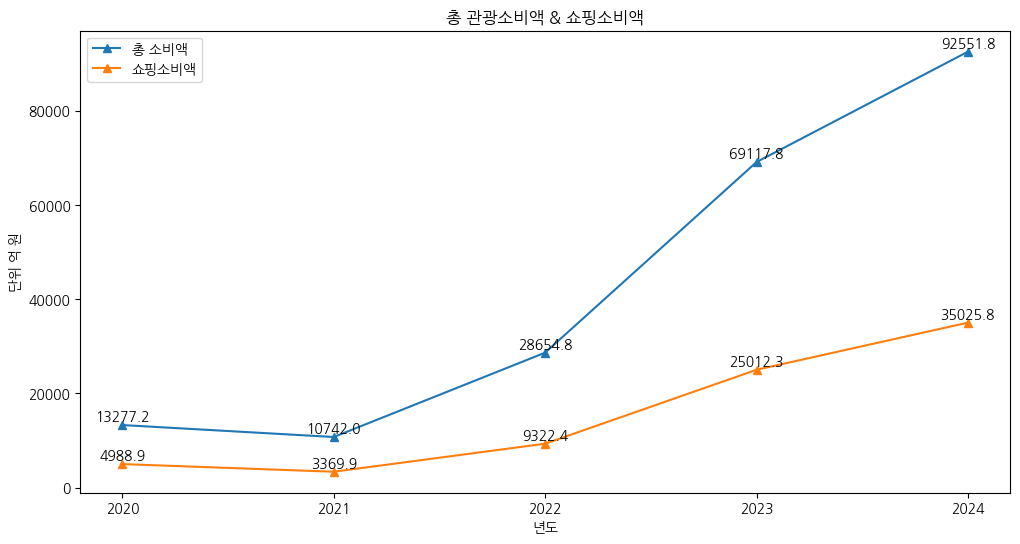

In [190]:
# 꺽은선그래프를 통해 두 수치의 상관성 파악
# 대상 t11 t13
xdata = tour11DF.index
yData1 = (tour11DF['조회기간 소비액'] /100_000_000).round(1)
# tour13DF
yData2 = (tour13DF['쇼핑소비액(천원)']/100_000).round(1)

# print(yData1)
plt.figure(figsize=(12,6))
# fig, ax = plt.subplots(figsize=(12, 6), dpi = 100)  # 100 DPI로 설정
# ax.plot(range(250), range(250))


plt.plot(xdata, yData1, '^-', label='총 소비액')
plt.plot(xdata, yData2, '^-', label='쇼핑소비액')

for i, value in enumerate(yData1):
    plt.text(xdata[i], value+1000, str(value), ha='center')  
for i, value in enumerate(yData2):
    plt.text(xdata[i], value+1000, str(value), ha='center')  
    
plt.title('총 관광소비액 & 쇼핑소비액')
plt.ylabel('단위 억 원')
plt.xlabel('년도')
plt.xticks(tour11DF.index)
plt.legend()
plt.show()



C:\Users\kdt\AppData\Local\Temp\ipykernel_42904\2612166339.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


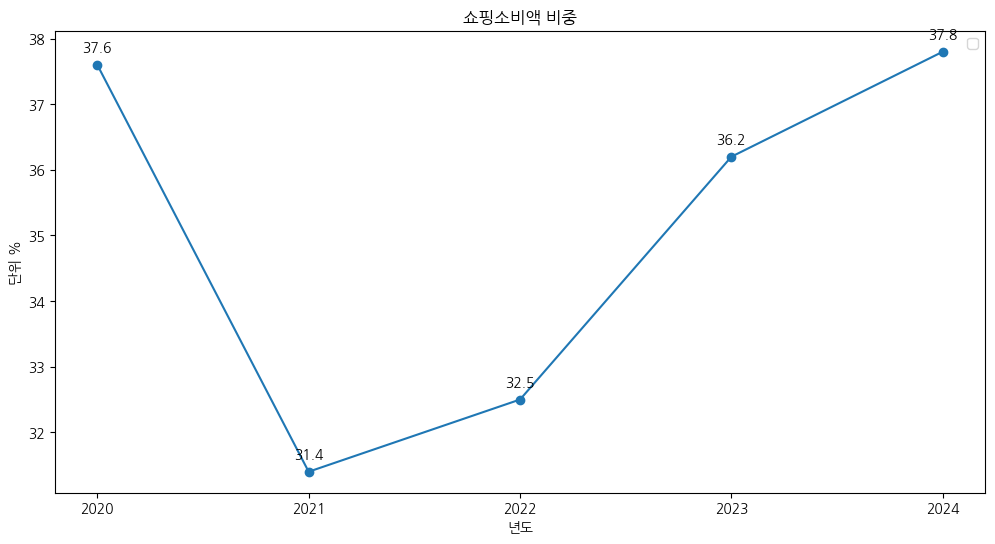

In [191]:
yData3 = ((yData2/yData1)*100).round(1)
plt.figure(figsize=(12,6))
plt.plot(xdata,yData3, 'o-')

for i, value in enumerate(yData3):
    plt.text(xdata[i], value+0.2, str(value), ha='center')  

plt.title('쇼핑소비액 비중')
plt.ylabel('단위 %')
plt.xlabel('년도')
plt.xticks(tour11DF.index)
plt.legend()
plt.show()

쇼핑 소비액이 증가추세에 있으며, 그 비중 또한 커지고 있다.

(12,) (12,)


C:\Users\kdt\AppData\Local\Temp\ipykernel_42904\2159934382.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


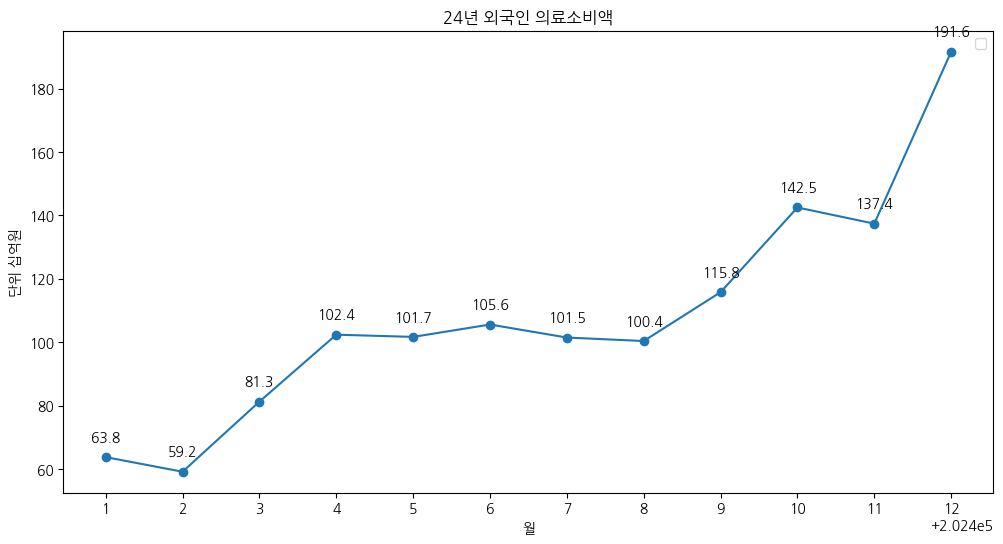

In [201]:
xdata = tour12DF['기준연월']
yData = (tour12DF['소비금액']/1_000_000_000).round(1)  #십억
print(xdata.shape, yData.shape)

plt.figure(figsize=(12,6))
plt.plot(xdata,yData, 'o-')

for i, value in enumerate(yData):
    plt.text(xdata[i], value+5, str(value), ha='center')  

plt.title('24년 외국인 의료소비액')
plt.ylabel('단위 십억원')
plt.xlabel('월')
plt.xticks(tour12DF['기준연월'])
plt.legend()
plt.show()

In [168]:
tour21DF.index
# tour22DF.index

Index([2020, 2021, 2022, 2023, 2024], dtype='int64', name='기준년월')

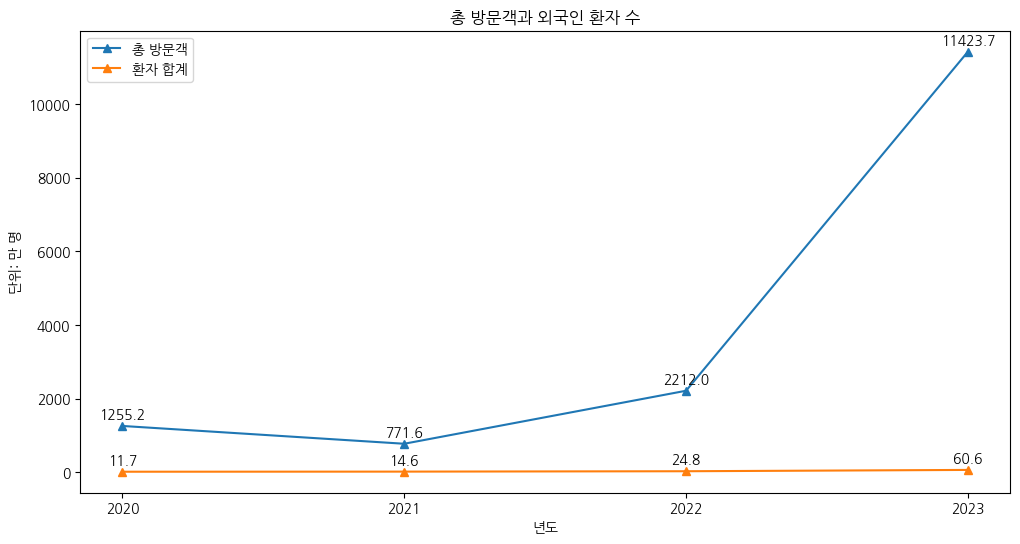

In [169]:
# 꺽은선그래프를 통해 두 수치의 상관성 파악
# 대상 t11 t13
xdata = tour21DF.index[0:4]
yData1 = (tour21DF.loc[[2020,2021,2022,2023],'조회기간 방문자 수'] /10_000).round(1)
# tour13DF
yData2 = (tour22DF.loc[[2020,2021,2022,2023],'합계']/10_000).round(1)



plt.figure(figsize=(12,6))

plt.plot(xdata, yData1, '^-', label='총 방문객')
plt.plot(xdata, yData2, '^-', label='환자 합계')
for i, value in enumerate(yData1):
    plt.text(xdata[i], value+200, str(value), ha='center')  
for i, value in enumerate(yData2):
    plt.text(xdata[i], value+200, str(value), ha='center')  
    
plt.title('총 방문객과 외국인 환자 수')
plt.ylabel('단위: 만 명')
plt.xlabel('년도')
plt.xticks(tour21DF.index[0:4])
plt.legend()
plt.show()


총 숫자대비 환자숫자는 크진 않지만
환자 자체의 숫자는 큰폭으로 증가하는 중이다.

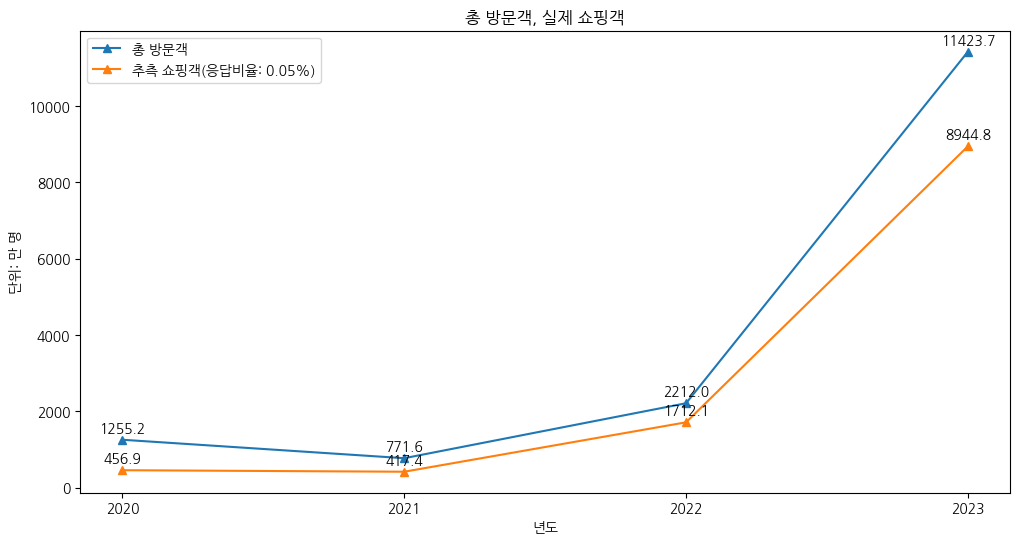

In [ ]:
# 꺽은선그래프를 통해 두 수치의 상관성 파악
# 대상 t11 t13
xdata = tour21DF.index[0:4]
yData1 = (tour21DF.loc[[2020,2021,2022,2023],'조회기간 방문자 수'] /10_000).round(1)
# tour13DF
yData2 = ((tour21DF.loc[[2020,2021,2022,2023],'조회기간 방문자 수'] /10_000) *
          (tour23DF.loc[[2020,2021,2022,2023],'쇼핑'])/100).round(1)



plt.figure(figsize=(12,6))

plt.plot(xdata, yData1, '^-', label='총 방문객')
plt.plot(xdata, yData2, '^-', label='추측 쇼핑객(응답비율: 0.05%)')
for i, value in enumerate(yData1):
    plt.text(xdata[i], value+200, str(value), ha='center')  
for i, value in enumerate(yData2):
    plt.text(xdata[i], value+200, str(value), ha='center')  
    
plt.title('총 방문객, 실제 쇼핑객')
plt.ylabel('단위: 만 명')
plt.xlabel('년도')
plt.xticks(tour21DF.index[0:4])
plt.legend()
plt.show()


응답자의 쇼핑 비율을 통해 실제 쇼핑객 수를 추측
쇼핑이 차지하는 비중을 높음을 확인.

[5] 결론.

외국인의 관광소비가 점차 커지는 가운데, 쇼핑과 의료가 급격하게 성장하고 있으며, 차지하는 비중도 점점 커짐을 확인할 수 있음.